# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [60]:
from bs4 import BeautifulSoup
import re
import pandas as pd
import requests
import json
import string
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



In [61]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [62]:
df_twitter_archive.info()
sum(df_twitter_archive.duplicated())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

0

In [63]:
#check for invalid name entries
df_twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Penny        10
Tucker       10
Winston       9
Bo            9
Sadie         8
the           8
Bailey        7
Toby          7
Buddy         7
an            7
Daisy         7
Rusty         6
Dave          6
Bella         6
Stanley       6
Jax           6
Leo           6
Scout         6
Milo          6
Koda          6
Jack          6
Oscar         6
Gus           5
           ... 
Pip           1
Skittles      1
Jerome        1
Trip          1
Skye          1
Lambeau       1
Moofasa       1
Apollo        1
Emanuel       1
Reptar        1
Harry         1
Blanket       1
Reagan        1
Rilo          1
Donny         1
Jarvis        1
Callie        1
Zooey         1
Antony        1
Juckson       1
Clarq         1
Rascal        1
Bertson       1
Poppy         1
Henry         1
Horace        1
Rey           1
Lucky         1
Brady         1
Tedrick       1
Name: name, Length: 957,

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [32]:
import requests
from bs4 import BeautifulSoup
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.status_code
#safe HTML to file
with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)



In [64]:
#Read file into pandas datafile
df_image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_prediction.head()

##Read file into BeautifulSoup
#with open ('image-predictions.tsv') as file:
#    soup = BeautifulSoup(file, 'lxml') 
##soup = BeautifulSoup("<html>data</html>")
#soup

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [65]:
df_image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
583,678800283649069056,https://pbs.twimg.com/media/CWuVQSLW4AAI3w9.jpg,1,Labrador_retriever,0.213673,True,beagle,0.146235,True,Airedale,0.122701,True
1439,774639387460112384,https://pbs.twimg.com/media/CsASZqRW8AA3Szw.jpg,1,Walker_hound,0.627593,True,basenji,0.128705,True,Ibizan_hound,0.126282,True
613,680145970311643136,https://pbs.twimg.com/media/CXBdJxLUsAAWql2.jpg,1,miniature_poodle,0.457117,True,toy_poodle,0.226481,True,Maltese_dog,0.067682,True
1690,815736392542261248,https://pbs.twimg.com/media/C1IT6rVXUAIvwYT.jpg,3,Border_collie,0.548907,True,Cardigan,0.178523,True,collie,0.146351,True
481,675362609739206656,https://pbs.twimg.com/media/CV9etctWUAAl5Hp.jpg,1,Labrador_retriever,0.479008,True,ice_bear,0.218289,False,kuvasz,0.139911,True
641,681320187870711809,https://pbs.twimg.com/media/CXSJGAQUQAAoG9Q.jpg,1,Samoyed,0.362596,True,Eskimo_dog,0.245395,True,Siberian_husky,0.108232,True
74,667393430834667520,https://pbs.twimg.com/media/CUMOyd3XIAAl13H.jpg,1,papillon,0.557009,True,Border_collie,0.271963,True,collie,0.073473,True
195,669583744538451968,https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg,1,candle,0.174315,False,lampshade,0.120407,False,plunger,0.072099,False
1139,729463711119904772,https://pbs.twimg.com/media/Ch-TXpFXAAAwPGf.jpg,1,German_shepherd,0.829307,True,Doberman,0.022500,True,basenji,0.021190,True
344,672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True


In [19]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 8341

Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 798576900688019456
Fail
607: 7983

Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 759846353224826880
Fail
890: 7597

Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167: 722613351520608256
Fail
1168:

Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441: 696886256886657024
Fail
1442: 696877980375769088
Fail
1443:

Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716: 680221482581123072
Fail
1717:

Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991:

Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265:

In [66]:
#add tweet_json file and extract tweet ID, retweet count, and favourite count into 
#pandas dataframe
tweet_extract = []
#load file using python json module
#JSONDecodeError: extra data so you wrap in a list
tweets = [json.loads(j) for j in open('tweet-json.txt', 'r')]

#Loop through each objects in the json file and extract required data
for tweet in tweets:
    favorite_count = tweet['favorite_count']
    tweet_id = tweet['id']
    retweet_count = tweet['retweet_count']
    
    #append to a list then convert to pandas dataframe
    tweet_extract.append({'tweet_id':int(tweet_id), 
                         'favorite_count':int(favorite_count),
                         'retweet_count':int(retweet_count)}) 

df_tweet = pd.DataFrame(tweet_extract, columns=['tweet_id','favorite_count','retweet_count'])
df_tweet.head()



,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [21]:
sum(df_tweet.duplicated())

0

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues
1. Twitter archive table: Practically empty/missing data across multiple columns (retweeted_status_id - retweeted_status_timestamps,in_reply_to_user_id, in_reply_to_status_id)

2. Twitter archive table: invalid or missing dog name - name represented with single letter or 'None'.

3. Twitter archive table: 'timestamps' column is in object format

4. Twitter archive table: Remove html tags from URLs in source column

5. Twitter archive table: Remove retweets

6. Twitter archive table: Remove ratings and URL in text column

7. Twitter archive table: Null values in 'expanded_urls' column

8. Image_prediction table: Invalid p1,p2,and p3 columns dog names such as hen, paper_towel etc

9. Image-prediction file column names are not descriptive

### Tidiness issues
1. Twitter Archive table: Dog stages in multiple columns

2. df_Tweet table should be part of Twitter archive table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [118]:
# Make copies of original pieces of data
df_twitter_archive_clean = df_twitter_archive.copy() 
df_image_prediction_clean = df_image_prediction.copy()
df_tweet_clean = df_tweet.copy()

### Tidiness issues 

#### #1 Twitter Archive table: Dog stages in multiple columns

#### Define: Dog stages in multiple columns which negates tidy data rule: Each variable forms a column. Dog stages will be combined into a column.

#### Code

In [68]:
df_twitter_archive_clean = pd.melt(df_twitter_archive_clean,
                                   id_vars=['tweet_id', 'in_reply_to_status_id',
                                            'in_reply_to_user_id', 'timestamp',
                                            'source', 'text', 'retweeted_status_id',
                                            'retweeted_status_user_id',
                                            'retweeted_status_timestamp', 'expanded_urls',
                                            'rating_numerator', 'rating_denominator','name'],
                                   var_name='dog_stage_title', 
                                   value_name='dog_stage')
df_twitter_archive_clean = df_twitter_archive_clean.drop('dog_stage_title', axis=1)

#### Test

In [69]:
print(df_twitter_archive_clean['dog_stage'].value_counts())
df_twitter_archive_clean.sample(20)

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
5058,831926988323639298,8.319030e+17,20683724.0,2017-02-15 18:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@UNC can confirm 12/10,NaN,NaN,NaN,NaN,12,10,None,None
1245,711732680602345472,NaN,NaN,2016-03-21 01:54:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I want to hear the joke this dog was just told...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711732680...,10,10,None,None
7547,815745968457060357,NaN,NaN,2017-01-02 02:26:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Levi. He's a Madag...,7.914070e+17,4.196984e+09,2016-10-26 22:31:36 +0000,https://twitter.com/dog_rates/status/791406955...,12,10,Levi,None
5578,762035686371364864,NaN,NaN,2016-08-06 21:20:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This left me speechless. 14/10 heckin heroic a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762035686...,14,10,None,None
8741,682303737705140231,NaN,NaN,2015-12-30 20:54:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Todo. He's screaming because he doesn'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682303737...,9,10,Todo,None
3092,780931614150983680,NaN,NaN,2016-09-28 00:46:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I want to finally rate this iconic puppo who t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780931614...,13,10,None,None
5766,742423170473463808,NaN,NaN,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None
2238,668113020489474048,NaN,NaN,2015-11-21 17:05:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's that one hypocritical gym ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668113020...,6,10,Alfie,None
842,766793450729734144,NaN,NaN,2016-08-20 00:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rufus. He just missed out on the 100m ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766793450...,10,10,Rufus,None
8163,736392552031657984,NaN,NaN,2016-05-28 03:04:00 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to mad pupper. You know what you did...,NaN,NaN,NaN,https://vine.co/v/iEggaEOiLO3,13,10,mad,None


#### #2:  df_Tweet table should be part of Twitter archive table

#### Define: Check duplicate column name and merge df_twitter_archive_clean with df_tweet table.

In [70]:
#
all_columns = pd.Series(list(df_tweet) + list(df_twitter_archive_clean) + list(df_image_prediction_clean))
all_columns[all_columns.duplicated()]

3     tweet_id
17    tweet_id
dtype: object

In [71]:
#Merge df_twitter_archive_clean with df_tweet dataset
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, 
                                     df_tweet, on=['tweet_id'], how='inner')

#### Test

In [111]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phinenones,None,39467,8853
4,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,6514
8,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461,4328
12,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal.,https://twitter.com/dog_rates/status/891689557...,13,10,Dnonerlnone,None,42908,8964
16,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Frnonenklin,None,41048,9774


In [75]:
#Duplicated entries observed
sum(df_twitter_archive_clean.duplicated())

6669

In [77]:
df_twitter_archive_clean.drop_duplicates(inplace=True)

In [81]:
print(sum(df_twitter_archive_clean.duplicated()))
df_twitter_archive_clean.head()

0


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467,8853
4,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,6514
8,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461,4328
12,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908,8964
16,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048,9774


### Quality issues

### Issue #1: Twitter archive table: Missing data across multiple columns

#### Define:

Missing Data in  columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

There is a possibility that the Columns 'doggo', 'floofer', 'pupper', 'puppo', are dog names and unique columns were created erroneously. This will be true if each unique entry has none value in the corressponding 'name' column.
This ascertion is confirmed as false using command:
df_twiter_archive[df_twiter_archive['doggo']=='doggo'].head() for each column name.

Data in listed in all columns above are less than 10% which quite negligible and will be dropped mostly because we have no supplimentary data.

#### Code

In [84]:


df_twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                             'retweeted_status_id', 'retweeted_status_user_id',
                             'retweeted_status_timestamp'], axis=1, inplace=True)
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467,8853
4,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,6514
8,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461,4328
12,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908,8964
16,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048,9774


#### Test

In [85]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 0 to 9412
Data columns (total 11 columns):
tweet_id              2747 non-null int64
timestamp             2747 non-null object
source                2747 non-null object
text                  2747 non-null object
expanded_urls         2682 non-null object
rating_numerator      2747 non-null int64
rating_denominator    2747 non-null int64
name                  2747 non-null object
dog_stage             2747 non-null object
favorite_count        2747 non-null int64
retweet_count         2747 non-null int64
dtypes: int64(5), object(6)
memory usage: 257.5+ KB


### Issue #2: Twitter archive table: invalid or missing dog name - for example name represented with single letter or 'None

#### Define
Dog name represented with single character or words like 'the'.
All occurences of single character will be replaced with 'None' for uniformity.

#### Code

In [87]:
#Replace 'a','the','very', and 'my' with 'none'
df_twitter_archive_clean['name'] = df_twitter_archive_clean['name'].apply(lambda x: x.replace("a", "none"))
df_twitter_archive_clean['name'] = df_twitter_archive_clean['name'].apply(lambda x: x.replace("the", "none"))
df_twitter_archive_clean['name'] = df_twitter_archive_clean['name'].apply(lambda x: x.replace("my", "none"))
df_twitter_archive_clean['name'] = df_twitter_archive_clean['name'].apply(lambda x: x.replace("very", "none"))
df_twitter_archive_clean['name'] = df_twitter_archive_clean['name'].apply(lambda x: x.replace("None", "none"))


#### Test

In [88]:
df_twitter_archive_clean.name.value_counts()

none              986
Oliver             14
Cooper             14
Chnonerlie         13
Bo                 13
Lucy               12
Lolnone            11
Tucker             10
Winston            10
Penny              10
just                9
Milo                8
Snonempson          8
Snonedie            8
Gus                 7
Sunny               7
Buddy               7
Bnoneiley           7
Dnoneisy            7
Jnonex              7
Toby                7
Loki                7
nonen               7
Bellnone            7
Scout               7
one                 6
Leo                 6
Mnoneggie           6
Gernoneld           6
Dnoneve             6
                 ... 
Stnoneniel          1
Livvie              1
Pherb               1
Link                1
Hnonervey           1
Stellnone           1
Joshwnone           1
Tnonessy            1
Gòrdón              1
Rnonendnonell       1
Benny               1
Freddery            1
Antony              1
Hnonenz             1
Bertson   

### Issue #3: Twitter archive table: 'timestamps' column is in object format

#### Define: Twitter archive table: 'timestamps' column is in object format. Data manipulation is easier when columns are in the right format.

#### Code

In [89]:

df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])

#### test

In [90]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 0 to 9412
Data columns (total 11 columns):
tweet_id              2747 non-null int64
timestamp             2747 non-null datetime64[ns]
source                2747 non-null object
text                  2747 non-null object
expanded_urls         2682 non-null object
rating_numerator      2747 non-null int64
rating_denominator    2747 non-null int64
name                  2747 non-null object
dog_stage             2747 non-null object
favorite_count        2747 non-null int64
retweet_count         2747 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 257.5+ KB


### Issue #4: Twitter archive table: Remove html tags from URLs in source column

#### Define: HTML tags present in this column makes it impossible to directly lift the data and consume programatically. This contamination is remove with the code below. 

#### Code

In [91]:

df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].apply(lambda x: re.findall('".*?"',x)[0])

#### Test

In [92]:
df_twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phinenones,None,39467,8853
4,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,6514


### Issue #5: Twitter archive table: Remove retweets

#### Define: Retweets are removed as part of the project instructions.

#### Code

In [93]:
#Retweets starts typically with capital letters 'RT' and so we will simply gather text without

df_twitter_archive_clean= df_twitter_archive_clean[df_twitter_archive_clean['text'].apply(lambda x: x[:2])!= 'RT']

#### Test

In [94]:
#Check for tweets starting with capital letters 'RT'

df_twitter_archive_clean[df_twitter_archive_clean['text'].apply(lambda x: x[:2])== 'RT']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count


### Issue #6 Twitter archive table: Remove ratings and URL in text column

#### Define: Present of data like URL and ratings in the text column violate primary data wrangling rule. This will be programatically cleaned.

#### Code

In [96]:

df_twitter_archive_clean['text'] = df_twitter_archive_clean['text'].apply(lambda x: x.split('/')[0].rstrip(string.digits))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [113]:
df_twitter_archive_clean.text

0       This is Phineas. He's a mystical boy. Only eve...
4       This is Tilly. She's just checking pup on you....
8       This is Archie. He is a rare Norwegian Pouncin...
12       This is Darla. She commenced a snooze mid meal. 
16      This is Franklin. He would like you to stop ca...
20      Here we have a majestic great white breaching ...
24      Meet Jax. He enjoys ice cream so much he gets ...
28      When you watch your owner call another dog a g...
32      This is Zoey. She doesn't want to be one of th...
36      This is Cassie. She is a college pup. Studying...
37      This is Cassie. She is a college pup. Studying...
40      This is Koda. He is a South Australian decksha...
44      This is Bruno. He is a service shark. Only get...
48      Here's a puppo that seems to be on the fence a...
51      Here's a puppo that seems to be on the fence a...
52      This is Ted. He does his best. Sometimes that'...
56      This is Stuart. He's sporting his favorite fan...
59      This i

### Issue #7: Twiter archive table: Null data in 'expanded_urls' column

#### Define: This exercise is simply to remove empty rows in the "expanded_urls" column

In [114]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['expanded_urls'].notnull()]

####  Test

In [115]:
print(df_twitter_archive_clean.info())
df_twitter_archive_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2465 entries, 0 to 9412
Data columns (total 11 columns):
tweet_id              2465 non-null int64
timestamp             2465 non-null datetime64[ns]
source                2465 non-null object
text                  2465 non-null object
expanded_urls         2465 non-null object
rating_numerator      2465 non-null int64
rating_denominator    2465 non-null int64
name                  2465 non-null object
dog_stage             2465 non-null object
favorite_count        2465 non-null int64
retweet_count         2465 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 231.1+ KB
None


tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
dog_stage             0
favorite_count        0
retweet_count         0
dtype: int64

### Issue #8: Image_prediction table: Invalid p1,p2,and p3 columns dog names such as hen, paper_towel etc

#### Define: A number of invalid names for Dogs will be removed. List of invalid words is first declared then replaced with the word 'none'.

In [119]:
invalid_words =['hen','fire_engine','mud_turtle','king_pengui','canoe','starfish','toilet_seat','African_crocodile','flamingo',
                'mailbox', 'panpipe', 'harp','soccer_ball','wood_rabbit', 'fiddler_crab', 'cheeseburger','lawn_mower',
                'guinea_pig', 'cliff', 'cup', 'studio_couch','sliding_door', 'clog', 'minibus', 'toyshop', 'bald_eagle','binoculars',
                'coil', 'rapeseed', 'sunglasses', 'jigsaw_puzzle', 'carousel', 'bubble', 'Christmas_stocking','polecat', 'hand_blower',
                'stone_wall','bookshop', 'skunk', 'bluetick','pillow', 'earthstar', 'EntleBucher', 'mailbox', 'panpipe', 'harp',
                'timber_wolf', 'espresso', 'brown_bear','beach_wagon', 'porcupine', 'quilt', 'pool_table', 'padlock','African_grey',
                'gas_pump', 'pedestal', 'ox', 'bakery','paddle','radio_telescope','jack-o-lantern', 'dishwasher', 'refrigerator', 
                'remote_control', 'shield', 'bookcase','hippopotamus','prison', 'teapot', 'car_mirror','street_sign','chimpanzee',
                'tricycle','swing','snail','electric_fan','scorpion','traffic_light','dining_table','leatherback_turtle','hamster',
                'box_turtle','lacewing','coho','maze','Angora','lacewing','slug','damselfly','mousetrap','three-toed_sloth',
                'tick','triceratops','bow_tie','microphone','paper_towel','vacuum','banana','electric_fan','orange',
                'sleeping_bag','seat_belt','ski_mask','ski_mask',
                'power_drill','home_theater','home_theater','lakeside','shopping_basket','web_site','comic_book',
                'desktop_computer','envelope','nail','china_cabinet','passenger_car','doormat','monitor','piggy_bank',
                'hair_spray','zebra','tiger','prairie_chicken','wombat','koala','beaver','Indian_elephant','comic_book',
                'envelope','book_jacket','jean','common_iguana','frilled_lizard','cock','handkerchief','shopping_cart',
                'military_uniform','boathouse','hummingbird','pencil_box','walking_stick','pencil_box','killer_whale',
                'suit','carton','sulphur-crested_cockatoo','water_buffalo','crash_helmet','sports_car','limousine',
                'minivan','lion','ram','cheetah','mashed_potato','laptop','printer','seat_belt','balloon','','police_van',
                'cash_machine','theater_curtain','goldfish','jellyfish','wool','goldfish','jellyfish','coral_reef',
                'tennis_ball','bathtub','Indian_elephant','joystick','window_screen','Egyptian_cat','wooden_spoon',
                'grand_piano','computer_keyboard','chain_saw','tennis_ball','great_white_shark','ice_bear','green_lizard',
                'sea_lion','prayer_rug','ostrich','car_wheel','tow_truck','shopping_cart','convertible']

#Replace each occurrence of the invalid words with the word 'none'

for word in invalid_words:
    df_image_prediction_clean.p1.replace(word, 'none', inplace=True)
    df_image_prediction_clean.p2.replace(word, 'none', inplace=True)
    df_image_prediction_clean.p3.replace(word, 'none', inplace=True)


In [120]:
df_image_prediction_clean.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1469,779056095788752897,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053365,True
966,706291001778950144,https://pbs.twimg.com/media/Cc0_2tXXEAA2iTY.jpg,1,Border_terrier,0.587101,True,bull_mastiff,0.164087,True,Staffordshire_bullterrier,0.105011,True
1711,818536468981415936,https://pbs.twimg.com/media/C1wGkYoVQAAuC_O.jpg,1,none,0.999403,False,Welsh_springer_spaniel,0.000062,True,bow,0.000030,False
1788,829861396166877184,https://pbs.twimg.com/media/C4RCiIHWYAAwgJM.jpg,1,Border_terrier,0.394486,True,Staffordshire_bullterrier,0.376574,True,American_Staffordshire_terrier,0.031292,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
623,680583894916304897,https://pbs.twimg.com/media/CXHrcFYWcAEE5_L.jpg,1,tub,0.889801,False,none,0.032351,False,none,0.014177,False
1591,798665375516884993,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,none,0.227150,False,Pomeranian,0.056057,True
1359,760893934457552897,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,1,Blenheim_spaniel,0.113992,True,cocker_spaniel,0.105780,True,borzoi,0.073935,True
334,672169685991993344,https://pbs.twimg.com/media/CVQGv-vUwAEUjCj.jpg,1,cocker_spaniel,0.991011,True,Sussex_spaniel,0.004032,True,miniature_poodle,0.001276,True
309,671538301157904385,https://pbs.twimg.com/media/CVHIhi2WsAEgdKk.jpg,1,park_bench,0.194211,False,water_bottle,0.071870,False,beacon,0.053433,False


### Issues #9 Image-prediction file column names are not descriptive

In [121]:
df_image_prediction_clean.rename(columns={'p1':'prediction1', 'p1_conf':'prediction1_confidence', 'p1_dog':'prediction1_validity',
                                          'p2':'prediction2', 'p2_conf':'prediction2_confidence', 'p2_dog':'prediction2_validity',
                                         'p3':'prediction3', 'p3_conf':'prediction3_confidence', 'p3_dog':'prediction3_validity'}
                                 ,inplace=True)

### Test

In [122]:
df_image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                  2075 non-null int64
jpg_url                   2075 non-null object
img_num                   2075 non-null int64
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
prediction1_validity      2075 non-null bool
prediction2               2075 non-null object
prediction2_confidence    2075 non-null float64
prediction2_validity      2075 non-null bool
prediction3               2075 non-null object
prediction3_confidence    2075 non-null float64
prediction3_validity      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Create a tidy master dataset

In [123]:
#Create a tidy master dataset with all pieces of gathered cleaned data
df_twitter_archive_master = pd.merge(df_twitter_archive_clean,
                                     df_image_prediction_clean, on=['tweet_id'],
                                     how='inner')
df_twitter_archive_master = df_twitter_archive_master.dropna()

In [124]:
sum(df_twitter_archive_master.duplicated())

0

In [125]:
print(df_twitter_archive_master.info())
df_twitter_archive_master.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2310 entries, 0 to 2309
Data columns (total 22 columns):
tweet_id                  2310 non-null int64
timestamp                 2310 non-null datetime64[ns]
source                    2310 non-null object
text                      2310 non-null object
expanded_urls             2310 non-null object
rating_numerator          2310 non-null int64
rating_denominator        2310 non-null int64
name                      2310 non-null object
dog_stage                 2310 non-null object
favorite_count            2310 non-null int64
retweet_count             2310 non-null int64
jpg_url                   2310 non-null object
img_num                   2310 non-null int64
prediction1               2310 non-null object
prediction1_confidence    2310 non-null float64
prediction1_validity      2310 non-null bool
prediction2               2310 non-null object
prediction2_confidence    2310 non-null float64
prediction2_validity      2310 non-null bool


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,prediction1,prediction1_confidence,prediction1_validity,prediction2,prediction2_confidence,prediction2_validity,prediction3,prediction3_confidence,prediction3_validity
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phinenones,None,39467,...,1,none,0.097049,False,bagel,0.085851,False,none,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal.,https://twitter.com/dog_rates/status/891689557...,13,10,Dnonerlnone,None,42908,...,1,none,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Frnonenklin,None,41048,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [126]:
df_twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [127]:
df_twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,prediction1,prediction1_confidence,prediction1_validity,prediction2,prediction2_confidence,prediction2_validity,prediction3,prediction3_confidence,prediction3_validity
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phinenones,None,39467,...,1,none,0.097049,False,bagel,0.085851,False,none,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal.,https://twitter.com/dog_rates/status/891689557...,13,10,Dnonerlnone,None,42908,...,1,none,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Frnonenklin,None,41048,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [128]:
df_twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,prediction1_confidence,prediction2_confidence,prediction3_confidence
count,2.310000e+03,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2.310000e+03,2.310000e+03
mean,7.373610e+17,12.119481,10.459307,9238.153247,2918.150649,1.210823,0.597314,1.344059e-01,5.961894e-02
std,6.719446e+16,38.562773,6.803805,12910.852171,5154.781911,0.572326,0.271474,1.014533e-01,5.080545e-02
min,6.660209e+17,0.000000,2.000000,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.769623e+17,10.000000,10.000000,2154.250000,666.000000,1.000000,0.367999,5.296192e-02,1.589698e-02
50%,7.104361e+17,11.000000,10.000000,4260.000000,1416.500000,1.000000,0.596839,1.160130e-01,4.883445e-02
75%,7.902045e+17,12.000000,10.000000,11512.750000,3265.750000,1.000000,0.846896,1.953582e-01,9.087927e-02
max,8.924206e+17,1776.000000,170.000000,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Analysing and Visualizing1: Top 5 most correctly predicted outcome based on neural network analysis

In [130]:
df_top_predicted = df_twitter_archive_master[df_twitter_archive_master['prediction1_validity']== True]
df_top_predicted.groupby('prediction1')['prediction1_validity'].value_counts().nlargest(5)

prediction1         prediction1_validity
golden_retriever    True                    175
Labrador_retriever  True                    112
Pembroke            True                    101
Chihuahua           True                     86
pug                 True                     62
Name: prediction1_validity, dtype: int64

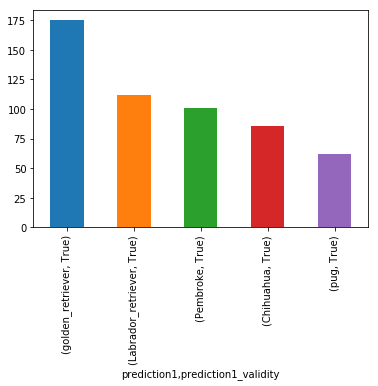

In [131]:
df_top_predicted = df_twitter_archive_master[df_twitter_archive_master['prediction1_validity']== True]
df_top_predicted.groupby('prediction1')['prediction1_validity'].value_counts().nlargest(5).plot(kind='bar');

#### Analyzing and visualizing2: Top 10 most rated dogs

In [132]:
df_Most_rated = df_twitter_archive_master[df_twitter_archive_master['prediction1']!= 'none']

df_Most_rated.groupby('prediction1')['rating_numerator'].value_counts().nlargest(10)


prediction1         rating_numerator
golden_retriever    12                  71
                    13                  35
Pembroke            12                  33
golden_retriever    11                  31
Labrador_retriever  12                  30
                    11                  28
Pembroke            11                  28
Labrador_retriever  10                  25
Chihuahua           12                  23
golden_retriever    10                  23
Name: rating_numerator, dtype: int64

#### Analyzing and visualizing3: Top 5 comments/dogs with most retweet/favorite counts

In [133]:

df_top_dog_names = df_twitter_archive_master[df_twitter_archive_master['name']!='none']
df_top_dog_names.nlargest(5, 'favorite_count')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,prediction1,prediction1_confidence,prediction1_validity,prediction2,prediction2_confidence,prediction2_validity,prediction3,prediction3_confidence,prediction3_validity
66,879415818425184262,2017-06-26 19:07:24,"""http://twitter.com/download/iphone""",This is Duddles. He did an attempt.,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,107956,...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True
475,807106840509214720,2016-12-09 06:17:20,"""http://twitter.com/download/iphone""",This is Stephan. He just wants to help.,https://twitter.com/dog_rates/status/807106840...,13,10,Stephnonen,None,107015,...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
126,866450705531457537,2017-05-22 00:28:40,"""http://twitter.com/download/iphone""",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jnonemesy,None,106827,...,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
127,866450705531457537,2017-05-22 00:28:40,"""http://twitter.com/download/iphone""",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jnonemesy,pupper,106827,...,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
394,819004803107983360,2017-01-11 02:15:36,"""http://twitter.com/download/iphone""",This is Bo. He was a very good First Doggo.,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,95450,...,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


### Insights:
1. The retriever (Golden and Labrador) appears to the most valued dog bread based on the high number of positive ratings from the general public.

2. The neural network analysis has the most success with dog breeds like Pembroke, Chihuahua, Labrador_retriever, Golden_retriever, and Pug 

3. Retriever breeds might be highly rated and popular but people appears more emotionally drawn to English Springer, Chihuahua, and French bulldog based on the number of favorite tweets.

### Visualization

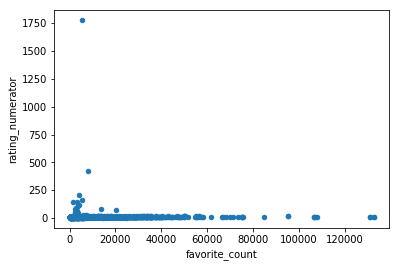

In [134]:
#Examining relationship between the dog ratings and how adorable people think they are.

df_twitter_archive_master.plot(x='favorite_count', y='rating_numerator', kind='scatter');
